In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option("display.precision", 4)

plt.style.use('dark_background')

# Using PCA for parsimony

## Create data

In [10]:
from sklearn import datasets
from sklearn.metrics import r2_score

n_feat = 40

X, y = datasets.make_regression(
    n_samples=1000,
    n_features=n_feat,
    noise=1,
    random_state=42
)

## Train / test split

In [11]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

## PCA

In [12]:
from sklearn.decomposition import PCA

# Apply PCA on training data
pca = PCA(n_components=n_feat)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Modeling

In [13]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from tqdm import tqdm

# Initialize models
rf = RandomForestRegressor(n_estimators=100, max_depth=5)
gb = GradientBoostingRegressor(n_estimators=100, max_depth=2)
dt = DecisionTreeRegressor(max_depth=5)
lr = LinearRegression()

# Store R² scores
rf_train_r2, rf_test_r2 = [], []
gb_train_r2, gb_test_r2 = [], []
dt_train_r2, dt_test_r2 = [], []
lr_train_r2, lr_test_r2 = [], []

# Loop over number of PCA components
for k in tqdm(range(1, n_feat + 1), ncols=50):
    X_train_k = X_train_pca[:, :k]
    X_test_k = X_test_pca[:, :k]

    # Random Forest
    rf.fit(X_train_k, y_train)
    rf_train_r2.append(r2_score(y_train, rf.predict(X_train_k)))
    rf_test_r2.append(r2_score(y_test, rf.predict(X_test_k)))

    # Gradient Boosting
    gb.fit(X_train_k, y_train)
    gb_train_r2.append(r2_score(y_train, gb.predict(X_train_k)))
    gb_test_r2.append(r2_score(y_test, gb.predict(X_test_k)))

    # Decision Tree
    dt.fit(X_train_k, y_train)
    dt_train_r2.append(r2_score(y_train, dt.predict(X_train_k)))
    dt_test_r2.append(r2_score(y_test, dt.predict(X_test_k)))

    # Linear Regression
    lr.fit(X_train_k, y_train)
    lr_train_r2.append(r2_score(y_train, lr.predict(X_train_k)))
    lr_test_r2.append(r2_score(y_test, lr.predict(X_test_k)))

100%|█████████████| 40/40 [00:33<00:00,  1.21it/s]


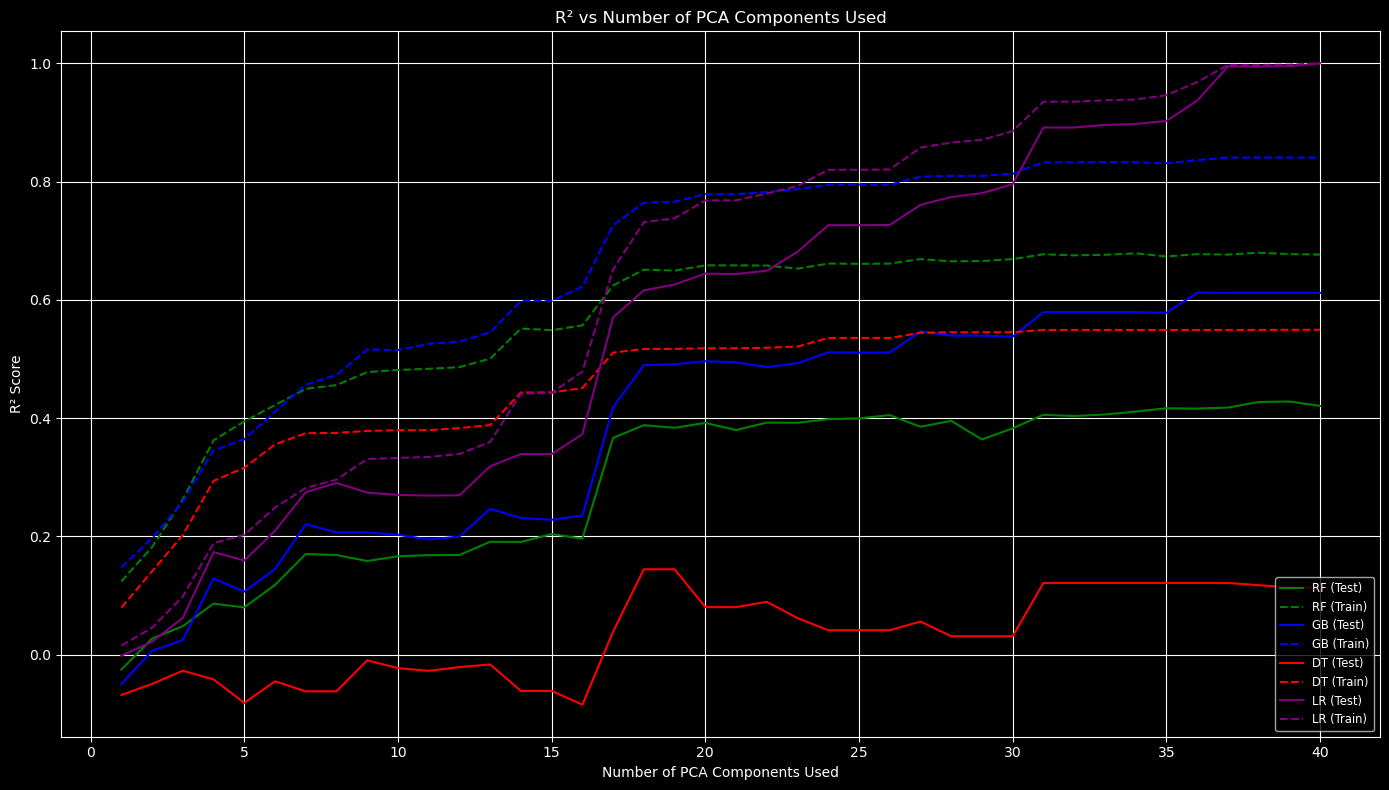

In [14]:
# Plotting
x = np.arange(1, n_feat + 1)
plt.figure(figsize=(14, 8))

# Random Forest (green)
plt.plot(x, rf_test_r2, color='green', label='RF (Test)')
plt.plot(x, rf_train_r2, '--', color='green', label='RF (Train)')

# Gradient Boosting (blue)
plt.plot(x, gb_test_r2, color='blue', label='GB (Test)')
plt.plot(x, gb_train_r2, '--', color='blue', label='GB (Train)')

# Decision Tree (red)
plt.plot(x, dt_test_r2, color='red', label='DT (Test)')
plt.plot(x, dt_train_r2, '--', color='red', label='DT (Train)')

# Linear Regression (purple)
plt.plot(x, lr_test_r2, color='purple', label='LR (Test)')
plt.plot(x, lr_train_r2, '--', color='purple', label='LR (Train)')

plt.xlabel("Number of PCA Components Used")
plt.ylabel("R² Score")
plt.title("R² vs Number of PCA Components Used")
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()